In [104]:
import pandas as pd
import numpy as np

# Given data
price_data = {
    "Jul-22": 3.7, "Aug-22": 3.6, "Sep-22": 3.44, "Oct-22": 4.35, "Nov-22": 4.06, "Dec-22": 3.12,
    "Jan-23": 3.27, "Feb-23": 2.83, "Mar-23": 2.75, "Apr-23": 2.59, "May-23": 2.35, "Jun-23": 2.43,
    "Jul-23": 2.67, "Aug-23": 3.12, "Sep-23": 3.33, "Oct-23": 3.11, "Nov-23": 2.91, "Dec-23": 2.63,
    "Jan-24": 2.68, "Feb-24": 2.77,
}

df = pd.DataFrame(list(price_data.items()), columns=['Month', 'Price'])
print(df)

     Month  Price
0   Jul-22   3.70
1   Aug-22   3.60
2   Sep-22   3.44
3   Oct-22   4.35
4   Nov-22   4.06
5   Dec-22   3.12
6   Jan-23   3.27
7   Feb-23   2.83
8   Mar-23   2.75
9   Apr-23   2.59
10  May-23   2.35
11  Jun-23   2.43
12  Jul-23   2.67
13  Aug-23   3.12
14  Sep-23   3.33
15  Oct-23   3.11
16  Nov-23   2.91
17  Dec-23   2.63
18  Jan-24   2.68
19  Feb-24   2.77


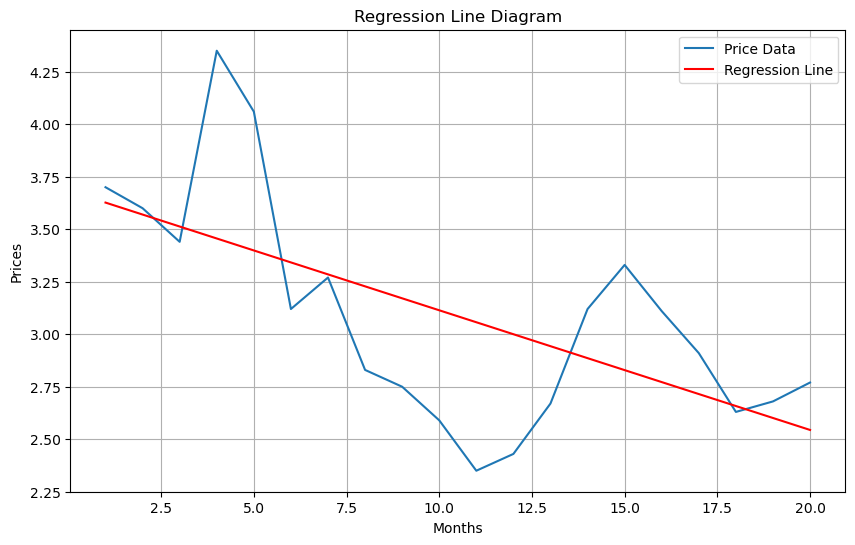

In [105]:
# Extracting month numbers for x-axis
months = list(range(1, len(price_data) + 1))

# Extracting prices for y-axis
prices = list(price_data.values())

# Performing linear regression
coefficients = np.polyfit(months, prices, 1)
poly = np.poly1d(coefficients)
line_x = np.linspace(1, len(price_data), 100)
line_y = poly(line_x)

# Plotting the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.plot(months, prices, label='Price Data')
plt.plot(line_x, line_y, color='red', label='Regression Line')
plt.xlabel('Months')
plt.ylabel('Prices')
plt.title('Regression Line Diagram')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
from scipy.stats import linregress

# Konversi data tanggal menjadi angka bulan
months = np.arange(1, len(price_data) + 1)

# Harga sebagai nilai y
prices = np.array(list(price_data.values()))

# Regresi linear
slope, intercept, _, _, _ = linregress(months, prices)

# Cetak hasil
print("Regression Equation: y = {0:0.3f} t + {1:0.3f}".format(slope, intercept))

Regression Equation: y = -0.057 t + 3.684


In [107]:
df['Index'] = range(1, len(df) + 1)
print(df)

     Month  Price  Index
0   Jul-22   3.70      1
1   Aug-22   3.60      2
2   Sep-22   3.44      3
3   Oct-22   4.35      4
4   Nov-22   4.06      5
5   Dec-22   3.12      6
6   Jan-23   3.27      7
7   Feb-23   2.83      8
8   Mar-23   2.75      9
9   Apr-23   2.59     10
10  May-23   2.35     11
11  Jun-23   2.43     12
12  Jul-23   2.67     13
13  Aug-23   3.12     14
14  Sep-23   3.33     15
15  Oct-23   3.11     16
16  Nov-23   2.91     17
17  Dec-23   2.63     18
18  Jan-24   2.68     19
19  Feb-24   2.77     20


In [108]:
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Fit the model
X = df['Index'].values.reshape(-1, 1)  # Features: Index
y = df['Price'].values                 # Target: Price
model.fit(X, y)

# Predict the next time period (next month)
next_time_index = np.array([[df['Index'].iloc[-1] + 1]])
predicted_price = model.predict(next_time_index)

print("The predicted diesel price in the next 1 time period is {:0.3f}".format(predicted_price[0]))

The predicted diesel price in the next 1 time period is 2.487
